In [57]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [96]:
data = torch.randint(low = -10, high = 11, size = (5000, 2)).float()
labels = torch.sum(data, axis = 1, keepdim = True).float()

In [156]:
# test train split 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = .2)

# converting into tensordataset 
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# dataloader 
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset))

In [157]:
def CreateNeuralNet():

    class NeuralNet(nn.Module):

        def __init__(self):
            super().__init__()

            # input layers 
            self.input = nn.Linear(2, 32)
            
            # hidden layers 
            self.hidden1 = nn.Linear(32, 16)
            self.hidden2 = nn.Linear(16, 64)

            # output layer 
            self.output = nn.Linear(64, 1)
        
        def forward(self, X):

            X = F.relu(self.input(X))
            X = F.relu(self.hidden1(X))
            X = F.relu(self.hidden2(X))
            
            return self.output(X)

    net = NeuralNet()
    lossfun = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr = .001)

    return net, lossfun, optimizer 


In [176]:
def trainNet():
    numepochs = 5

    net, lossfun, optimizer = CreateNeuralNet()

    trainAcc = []
    testAcc = []
    losses = np.zeros(numepochs)

    for epochi in range(numepochs):

        net.train()
        batchAcc = []
        batchLoss = []

        for X, y in train_loader:

            yHat = net(X)
            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # accuracy
            matches = (torch.round(yHat) == y).float()
            accuracypct = 100 * torch.mean(matches)

            batchAcc.append(accuracypct)
            batchLoss.append(loss.item())

        losses[epochi] = np.mean(batchLoss) 
        trainAcc.append(np.mean(batchAcc))

        # testing
        net.eval()
        X, y = next(iter(test_loader))

        with torch.inference_mode():
            yHat = net(X)
            matches = (torch.round(yHat) == y).float()
            accuracypct = 100 * torch.mean(matches)
            testAcc.append(accuracypct)

    return trainAcc, testAcc, losses, net


In [177]:
trainAcc, testAcc, losses, net = trainNet()

In [178]:
print(f'The train Accuracy is {trainAcc[-1]}')
print(f"The test Accuracy is {testAcc[-1]}")

The train Accuracy is 100.0
The test Accuracy is 100.0


In [179]:
for i in range(10):

    trainAcc, testAcc, losses, net = trainNet()
    print(f'The Train Accuracy is {trainAcc[-1]}, and Test Accuracy is {testAcc[-1]}')
    
    

The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 99.875, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0
The Train Accuracy is 100.0, and Test Accuracy is 100.0


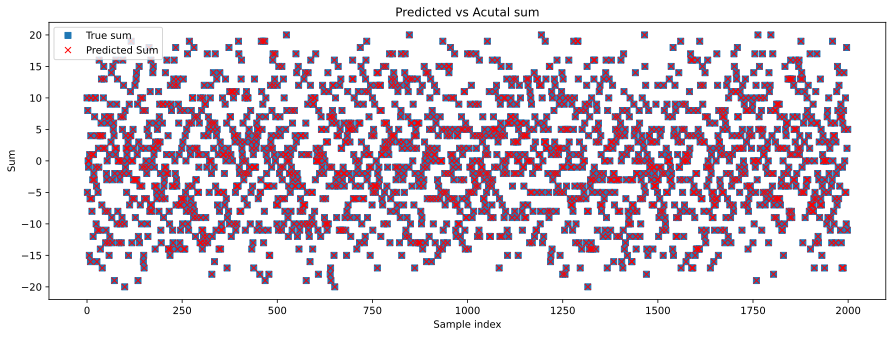

In [180]:
data =torch.randint(low = -10, high = 11, size = (2000,2)).float()
labels = torch.sum(data, axis = 1, keepdim = True)

with torch.inference_mode():
    predictions = net(data)

fig = plt.figure(figsize = (15, 5))
plt.plot(labels, 's')
plt.plot(np.round(predictions.detach()), 'rx')
plt.legend(['True sum', 'Predicted Sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs Acutal sum')
plt.show()
